In [1]:
#! pip install langdetect

In [2]:
import pandas as pd
import spacy
nlp_en = spacy.load('en')
#nlp_fr = spacy.load('fr')
pd.set_option('max_colwidth', 80)
#from langdetect import detect
import emoji

from re import sub, split
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
import seaborn as sns

def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d


def clean_twitter(s):
    """ Cleans Twitter specific issues
    
    Should probably clean out mentions, URLs, and RT's.
    """
    # TODO: Use regular expressions to remove unwanted
    # text and clean up our tweets to be more usable!
    s = sub("RT ", "", s) #retweets
    s = sub("@[A-Za-z0-9_=:.]*", "", s) #mentions
    s = sub(r"http\S+", "", s) #hyperlinks
    s = sub("\n", " ", s) #carriage returns
    s = sub("w/", "with", s) #with
    s = sub("#", "", s) #hashtag start
    s = sub("%", " percent", s) #percent
    s = sub("&amp;", "and", s) #ampersand
    s = sub("&gt;", "", s) #greater than...
    s = sub(' +', ' ',s) #extra spaces
    s = s.lower()

    # BONUS: Try using the library "spacy" to 
    # do further processing, such as lemmatizing
    # or replacing Named Entities with constants (i.e. "[NAMED]")
    # or adding the part of speech or dependency code to the word 
    #based on language...
    #try:
    #    lang = detect(s)
    #except:
    #    lang='en'
    #if lang=='fr':
    #    doc = nlp_fr(s)
    #else:
    #    doc = nlp_en(s)
    doc = nlp_en(s)
    NE = str(list(doc.ents)) #Named Entities
    for token in doc:
        #Add POS tags
        #s = ([token.lemma_ + "_" + token.pos_ for token in doc if not (token.is_stop | token.is_punct)])
        #get lemmas, turn emojis to text, remove punctuation and stopwords
        s = ([emoji.demojize(token.lemma_) for token in doc if not (token.is_stop | token.is_punct)])
        #replace named entities with constant 
        s = [t if t not in NE else '[NAMED]' for t in s]
        #make back into one string
        s = ' '.join([w for w in s])
    return s

In [3]:
X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label

In [4]:
s = X[2224]
clean_twitter(s)

'[NAMED] medium organization russia [NAMED] prime source russian propaganda united state found [NAMED]'

In [5]:
X.map(clean_twitter)

0                                                         cnn sharia law stone hand cut
1         look obama clinton crony illegally arm train muslim terrorist include isis...
2       [NAMED] [NAMED] bengarrison cartoon [NAMED] obama get crown war debt taxis o...
3                                                      islam peace trump maga isis tcot
4                                              aboard trump train choochoo :locomotive:
5                     flashback judicial watch release huma abedin deposition testimony
6                                 follow fbi presser say system rig weigh foxldt 7 p.m.
7                                                                   trump run rig press
8       [NAMED] literally [NAMED] [NAMED] hillary supporter online astroturfe spamme...
9                                                                                 islam
10        psycho mother hillary evil maga basketofdeplorable neverhillary trumpswfl ...
11                          unth

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

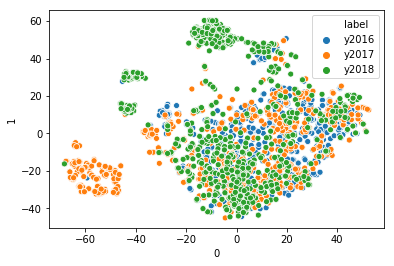

In [7]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

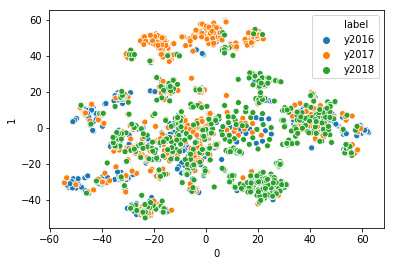

In [8]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

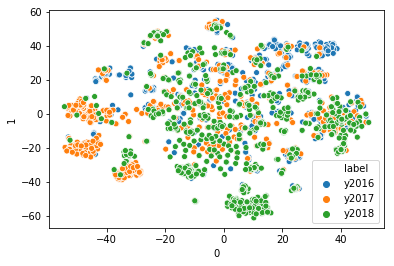

In [9]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
# Can you get things to separate in the space in a better way? 
#stop words already removed...
vectorizer = TfidfVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)